In [8]:
import pandas as pd     
import matplotlib.pyplot as plt        
import seaborn as sns            
import numpy as np          
from sklearn.linear_model import LinearRegression      

from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
# Read the CSV files
df1 = pd.read_csv('E:\Python\ML\calories.csv')
df2 = pd.read_csv('E:\Python\ML\exercise.csv')

# Merge the DataFrames
df = pd.merge(df1, df2, on='User_ID', how='inner')

# Save the merged DataFrame to a new CSV file
df.to_csv('E:\Python\ML\merged_file.csv', index=False)


In [10]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [11]:
df.tail()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3
14999,11751526,98.0,male,63,173.0,79.0,18.0,92.0,40.5


In [12]:
df.shape

(15000, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
df.isna().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5


In [17]:
df.describe(include='object').T

,count,unique,top,freq
Gender,15000,2,female,7553


In [18]:
num_col = df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['User_ID', 'Calories', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

<Axes: >

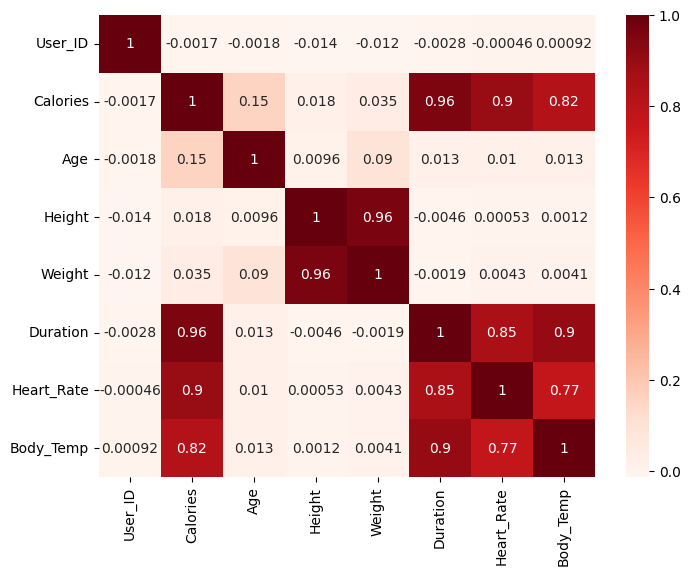

In [19]:
corr = df[df.select_dtypes(include=['int64','float64']).columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(annot=True, data=corr, cmap = 'Reds')

<Axes: xlabel='Age', ylabel='Calories'>

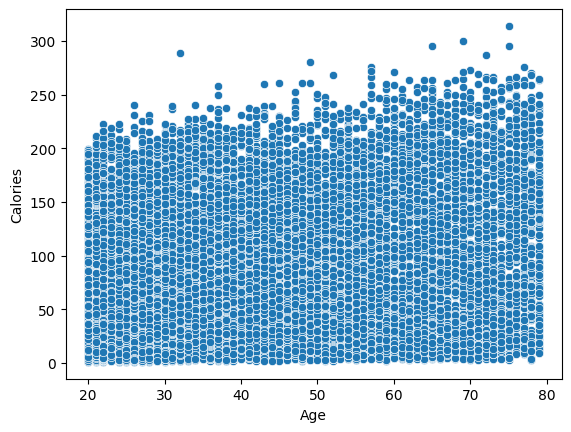

In [20]:
sns.scatterplot(data=df,x='Age',y='Calories')

<Axes: xlabel='Height', ylabel='Calories'>

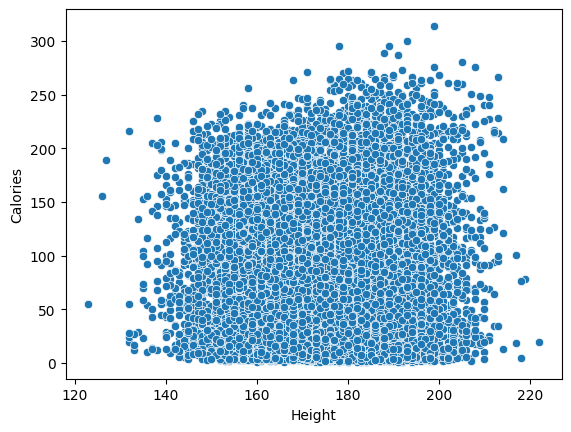

In [21]:
sns.scatterplot(data=df,x='Height',y='Calories')

<Axes: xlabel='Weight', ylabel='Calories'>

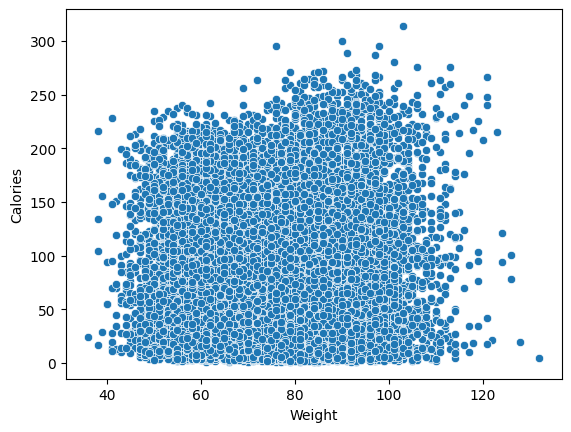

In [22]:
sns.scatterplot(data=df,x='Weight',y='Calories')

<Axes: xlabel='Duration', ylabel='Calories'>

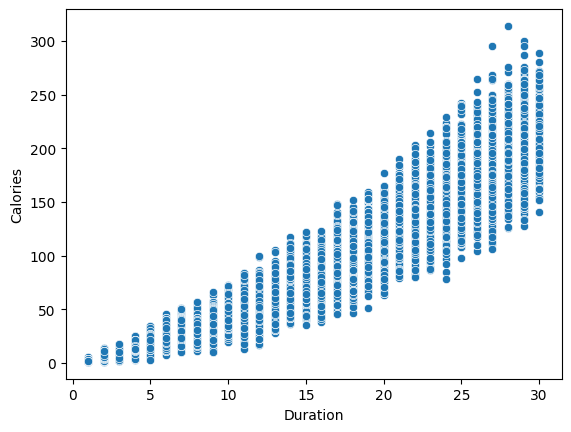

In [23]:
sns.scatterplot(data=df,x='Duration',y='Calories')

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

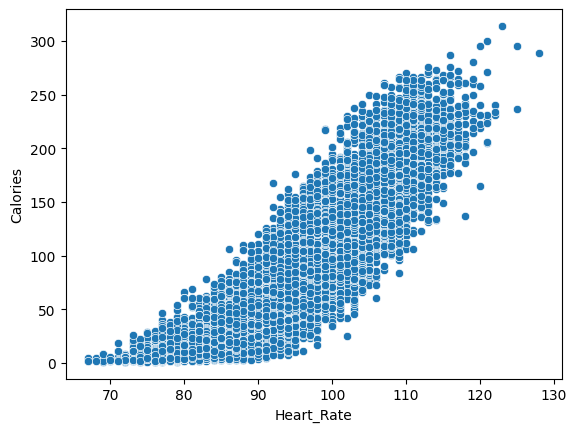

In [24]:
sns.scatterplot(data=df,x='Heart_Rate',y='Calories')

<Axes: xlabel='Body_Temp', ylabel='Calories'>

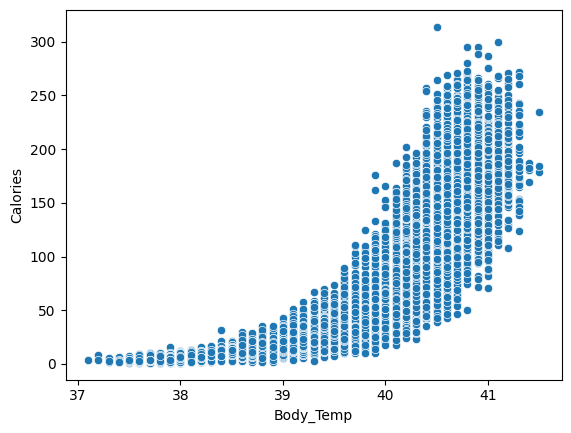

In [25]:
sns.scatterplot(data=df,x='Body_Temp',y='Calories')

In [26]:
x= np.array(df['Duration'])
y= np.array(df['Calories'])

In [27]:
def slope(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    rise = sum((x-x_mean)*(y-y_mean))
    run = sum((x-x_mean)**2)
    m = rise/run
    return m
m = slope(x,y)
m

np.float64(7.1728838379072615)

In [28]:
X= np.array(df['Duration']).reshape(-1,1)
Y= np.array(df['Calories']).reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [29]:
slope = model.coef_
slope

array([[7.17288384]])

In [30]:
def intercept(x,y,m):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    c = y_mean - m*x_mean
    return c
c = intercept(x,y,m)
c

np.float64(-21.859656399669177)

In [31]:
intercept = model.intercept_
intercept

array([-21.8596564])

In [32]:
def y_predicted(x,m,c):
    y_pred = m*x+c
    return y_pred
df['y_pred'] = y_predicted(x,m,c)
z = np.array(df['y_pred'])
z

array([186.1539749 ,  78.56071733,  14.00476279, ...,  92.90648501,
        -7.51388872, 107.25225268])

<Axes: >

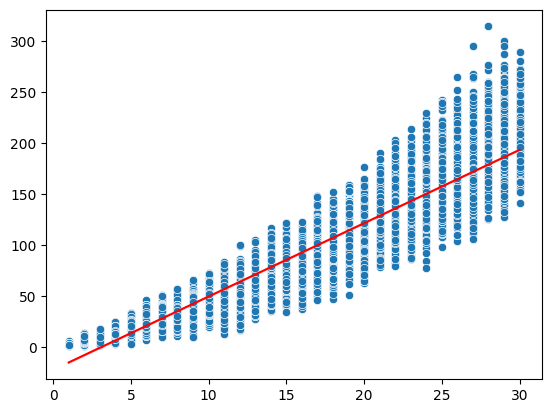

In [33]:
sns.scatterplot(data = df, x = x,y=y)
sns.lineplot(data =df, x=x, y =z, color = 'Red')

In [34]:
def accuracy(x,y,z):
   y_mean = np.mean(y)
   ss_res = sum((y - z)**2)
   ss_total = sum((y - y_mean)**2)
   r_2 = 1-(ss_res/ss_total) 
   return r_2
r2 = accuracy(x,y,z)
r2

np.float64(0.9128283957842548)

In [35]:
from sklearn.metrics import r2_score

r2_sklearn = r2_score(Y, z)
print(r2_sklearn)

0.9128283957842549


In [36]:
type(z)

numpy.ndarray

In [37]:
y_pred = model.predict(X)
y_pred

array([[186.1539749 ],
       [ 78.56071733],
       [ 14.00476279],
       ...,
       [ 92.90648501],
       [ -7.51388872],
       [107.25225268]])

In [38]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Initialize the model
# model = LinearRegression()

# # Train the model
# model.fit(X_train, Y_train)

# # Predict using the trained model
# y_pred = model.predict(X_test)

# # Output the predicted values
# print("Predicted values:", y_pred)

In [39]:
from sklearn.metrics import r2_score

r2_sklearn = r2_score(Y, y_pred)
print(r2_sklearn)

0.9128283957842549


In [40]:
# #The ValueError: Per-column arrays must each be 1-dimensional 
# #error occurs because Seaborn’s scatterplot and lineplot functions expect 1-dimensional arrays for the x and y parameters.
# X_test_flat = X_test.flatten()
# Y_test_flat = Y_test.flatten()
# y_pred_flat = y_pred.flatten()
# sns.scatterplot(x = X_test_flat,y=Y_test_flat)
# sns.lineplot(x=X_test_flat, y =y_pred_flat, color = 'Red')

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df[['Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp']])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)

      Feature           VIF
0       const  14433.685749
1         Age      1.087827
2      Height     13.259685
3      Weight     13.367861
4    Duration      8.059124
5  Heart_Rate      3.669088
6   Body_Temp      5.427413
